# Missing data and aggregations

In [22]:
import pandas as pd
import numpy as np

np.random.seed(1337)
size = 8

random_matrix = np.random.randint(1, 10, (size, size))

print(f"{random_matrix.size = }")

index = np.random.choice(random_matrix.size, 10, replace=False) #replace = False för att inte skall kunna plocka dubletter (True defoult)
print(f"{index = }")

# random_matrix[5,3] = 999 # [rad, kolumn]

# Type converts to float so we can change elements to None (eftersom np.None är float)
random_matrix = random_matrix*1. # mutliplicerar med 1.0 för att omvandla till float

random_matrix.ravel()[index] = None # ravel falttens 2D to 1D array, None för att sabotera

random_matrix

random_matrix.size = 64
index = array([28, 42, 17, 49, 53, 31, 35,  2, 13, 62])


array([[ 8.,  9., nan,  8.,  3.,  3.,  5.,  9.],
       [ 7.,  7.,  8.,  9.,  2., nan,  7.,  3.],
       [ 3., nan,  2.,  8.,  4.,  2.,  4.,  4.],
       [ 5.,  9.,  9.,  8., nan,  2.,  7., nan],
       [ 5.,  3.,  6., nan,  5.,  3.,  4.,  3.],
       [ 5.,  9., nan,  4.,  9.,  9.,  8.,  5.],
       [ 4., nan,  2.,  3.,  1., nan,  9.,  3.],
       [ 2.,  1.,  2.,  5.,  3.,  1., nan,  8.]])

In [23]:
scores = pd.DataFrame(
    random_matrix,
    index = [f"Player {i}" for i in range(1, size+1)],
    columns = [f"Round {i}" for i in range (1, size + 1)],
)

scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,NaN,8.0


## Missing data

In [24]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,False,True,False,False,False,False,False
Player 2,False,False,False,False,False,True,False,False
Player 3,False,True,False,False,False,False,False,False
Player 4,False,False,False,False,True,False,False,True
Player 5,False,False,False,True,False,False,False,False
Player 6,False,False,True,False,False,False,False,False
Player 7,False,True,False,False,False,True,False,False
Player 8,False,False,False,False,False,False,True,False


In [25]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Player 1 to Player 8
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Round 1  8 non-null      float64
 1   Round 2  6 non-null      float64
 2   Round 3  6 non-null      float64
 3   Round 4  7 non-null      float64
 4   Round 5  7 non-null      float64
 5   Round 6  6 non-null      float64
 6   Round 7  7 non-null      float64
 7   Round 8  7 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [26]:
scores.loc["Player 8"]["Round 7"] = 4

In [27]:
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


In [28]:
scores.dropna() #drops all rows that contain NaN (defoult att slänga rader)

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


In [29]:
scores.dropna(axis = "columns", inplace = False) # men kan indikera att istället slänga kolumner;
#om inplace = True muteras "scores"; False är defoult och behöver eg inte skrivas in här
# annars anävnds nytt_namn = scores.dropna(... ) sparar den muterade DF i nytt namn

,Round 1,Round 7
Player 1,8.0,5.0
Player 2,7.0,7.0
Player 3,3.0,4.0
Player 4,5.0,7.0
Player 5,5.0,4.0
Player 6,5.0,8.0
Player 7,4.0,9.0
Player 8,2.0,4.0


In [30]:
scores.fillna()

ValueError: Must specify a fill 'value' or 'method'.

In [ ]:
scores.fillna(0, inplace = True) #ersätter NaN med siffran i paranteserna; inplace = True ger samma som scores = scores.fillna(0)

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,0.0,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,0.0,7.0,3.0
Player 3,3.0,0.0,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,0.0,2.0,7.0,0.0
Player 5,5.0,3.0,6.0,0.0,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,0.0,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,0.0,2.0,3.0,1.0,0.0,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


## Missing data - strategy

In [ ]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
type(titanic["survived"])

pandas.core.series.Series

In [ ]:
titanic["survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [ ]:
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.describe() #bara kolumner med numeriska värden tas upp

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
nans = titanic.isnull().head()
nans

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
nans = titanic.isnull().sum()
nans

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

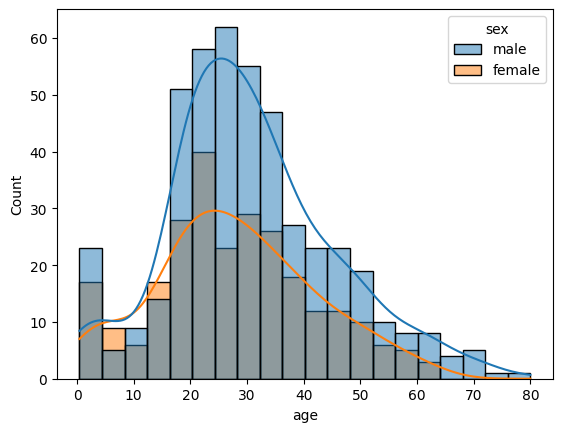

In [ ]:
sns.histplot(data = titanic, x = "age", hue = "sex",  kde=True)
# hue ger färgen baserat på sex så män och female
# kde ger distributionen

In [ ]:
# strategy: domain expert advises to fill NaN with median age of corresponding gender

titanic["sex"]== "male"

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: sex, Length: 891, dtype: bool

In [ ]:
median_male_age = titanic[titanic["sex"]== "male"]["age"].median()
median_female_age = titanic[titanic["sex"]== "female"]["age"].median()

median_male_age, median_female_age

(29.0, 27.0)

In [ ]:
titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age)
# loc[condition, series]
# fillna ersätter NaN w/ 29.0

0      22.0
4      35.0
5      29.0
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: age, Length: 577, dtype: float64

In [ ]:
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age)
titanic.loc[titanic["age"] == 29, "sex"].value_counts()

# här borde female bara vara 7

male      137
female     60
Name: sex, dtype: int64

In [ ]:
titanic["age"].isnull().sum()
# här borde female vara 53

0

In [ ]:
titanic.loc[titanic["age"].isnull(), "sex"].value_counts()
# borde ge att det bara är females kvar, 53 st

Series([], Name: sex, dtype: int64)

In [ ]:
# fill in the rest of nans with emdian female age
titanic["age"] = titanic["age"].fillna(median_female_age)
titanic.isnull().sum()["sex"]

0

<AxesSubplot: xlabel='age', ylabel='Count'>

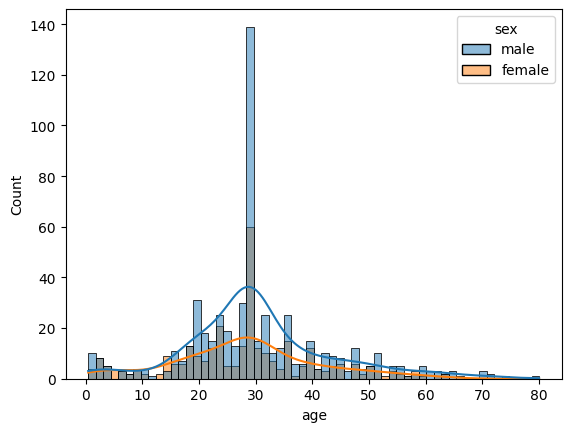

In [ ]:
sns.histplot(data = titanic, x = "age", kde = True, hue = "sex", bins = 60) #bins är antalet staplar
#plotten stämmer.... fastän svaren ovan inte gör det

## Aggregations

- summarizing data
    - sum()
    - mean()
    - median()
    - max()
    - min()

In [31]:
import seaborn as sns 
titanic = sns.load_dataset("titanic")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
# TODO : examine this deprecation with numeric_only - verkar räkna på alla numeriska kolumner även om bara 2 specificerade - inte bra sätt se nedan
titanic.groupby("sex").mean(["survived", "age"])

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


In [36]:
titanic.groupby("sex").mean(["survived", "age"])["survived"]    # inte bra sätt se nedan

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [39]:
survivors = titanic.groupby("sex").mean(["survived", "age"])[["survived", "age"]] # obs dubbla paranteser
survivors

,survived,age
sex,,
female,0.742038,27.915709
male,0.188908,30.726645


In [41]:
survived_females_percentage = 100*survivors.loc["female", "survived"]
survived_males_percentage = 100*survivors.loc["male", "survived"]

print(f"Percentage of females that survived {survived_females_percentage:.1f}%")
print(f"Percentage of males that survived {survived_males_percentage:.1f}%")

Percentage of females that survived 74.2%
Percentage of males that survived 18.9%


In [44]:
titanic.groupby("class")[["age", "fare"]].mean()     # plockar ut age och fare och kör därefter mean #bra sätt :)

,age,fare
class,,
First,38.233441,84.154687
Second,29.877630,20.662183
Third,25.140620,13.675550


In [45]:
titanic.groupby(["survived", "pclass"]).count() #grupperar på 2 parametrar 

sex  age  sibsp  parch  fare  embarked  class  who  \
survived pclass                                                       
0        1        80   64     80     80    80        80     80   80   
         2        97   90     97     97    97        97     97   97   
         3       372  270    372    372   372       372    372  372   
1        1       136  122    136    136   136       134    136  136   
         2        87   83     87     87    87        87     87   87   
         3       119   85    119    119   119       119    119  119   

                 adult_male  deck  embark_town  alive  alone  
survived pclass                                               
0        1               80    58           80     80     80  
         2               97     3           97     97     97  
         3              372     6          372    372    372  
1        1              136   117          134    136    136  
         2               87    13           87     87     87  
         3              119     6          119    119    119

In [48]:
survived_class = titanic.groupby(["survived", "pclass"]).count().reset_index()   #får tillbaka vanlig index DataFrame
survived_class

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,1,80,64,80,80,80,80,80,80,80,58,80,80,80
1,0,2,97,90,97,97,97,97,97,97,97,3,97,97,97
2,0,3,372,270,372,372,372,372,372,372,372,6,372,372,372
3,1,1,136,122,136,136,136,134,136,136,136,117,134,136,136
4,1,2,87,83,87,87,87,87,87,87,87,13,87,87,87
5,1,3,119,85,119,119,119,119,119,119,119,6,119,119,119


<AxesSubplot: xlabel='pclass', ylabel='sex'>

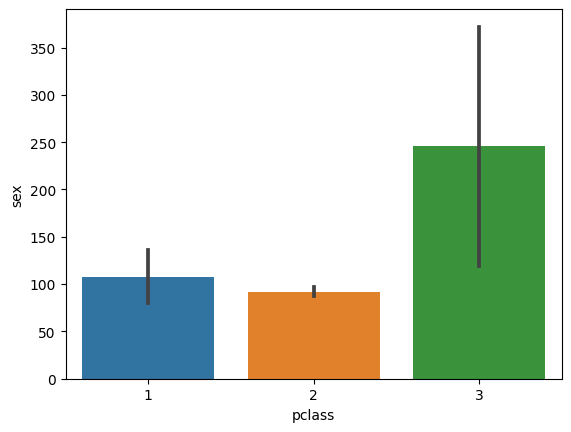

In [54]:
sns.barplot(data = survived_class, x = "pclass", y = "sex")

In [ ]:
# toexcel eller tocsv för att spara
# i csv värde, värde, värde,, värde etc  /,, är ett missing value

TODO: use who category and find median instead of sex category